# Unsupervised Learning, Clustering and Kmeans

Thus far we have investigated supervised learning techniques; with these, we have been creating mathematical mappings between two spaces, X and y. Unsupervised learning is different by nature in that we are looking to uncover patterns and structures within the overall data itself rather then mappings between two sets of variables for predictive modelling. A classic and easy to understand unsupervised learning technique is the K-means algorithm. This algorithm takes a set of data and groups the individaul datapoints based on which points are the most similar to one another. Clustering techniques like this can be used for a variety of application purposes such as grouping products, people, places, pictures or time periods together.

# Kmeans via scikit learn
With that lets look at how to implement the Kmeans algorithm from a practitioner's point of view.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load in some sample data from sklearn
digits = load_digits()
df = pd.DataFrame(digits.data)
print('Length of dataset:', len(df))
df.head()

Length of dataset: 1797


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


8x8 Pixel Grayscale Handwritten Digits preview


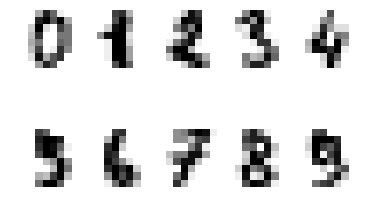

In [3]:
print('8x8 Pixel Grayscale Handwritten Digits preview')
for idx, image in enumerate(digits.images[:10]):
    plt.subplot(2, 5, idx+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [4]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(df)
df['Cluster'] = kmeans.predict(df)
#Change Cluster Labels to Letters to Avoid Confusion
num_to_letters = dict(zip(list(range(10)), list(string.ascii_lowercase)[:10]))
df['Cluster'] = df['Cluster'].map(num_to_letters)
print(df.Cluster.value_counts())
df.head()

d    250
c    221
f    212
e    182
b    179
j    177
h    174
g    168
a    146
i     88
Name: Cluster, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,b
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,c
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,c
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,j
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,g


## Cluster Sizes
Notice above that the various clusters are not equally sized. This is normal behavior; groupings are made to be homogenous, not equallly distributed.

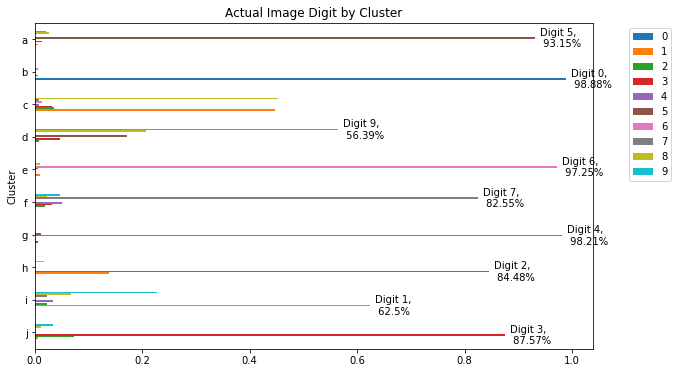

In [5]:
df['Number'] = digits.target
temp = pd.DataFrame(df.groupby('Cluster')['Number'].value_counts(normalize=True))
temp.columns= ['Percent of Cluster']
temp = temp.reset_index()
temp = temp.pivot(index='Cluster', columns='Number', values='Percent of Cluster')
temp = temp.sort_index(ascending=False)

ax = temp.plot(kind='barh', figsize=(10,6))
plt.title('Actual Image Digit by Cluster')
ax.legend(bbox_to_anchor=(1.15,1))

rects = ax.patches

labels = temp.columns
# For each bar: Place a label
for n, rect in enumerate(rects):
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
    label = labels[n//10]
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'
    try:
        percent = int(round(temp.iloc[n%10][n//10],4)*10000)/100
    except:
        continue
    final_label = 'Digit {},\n {}%'.format(label, percent)
    if x_value > 0.5:
        # Create annotation
        plt.annotate(
            final_label,                # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                      # Horizontally align label differently for
                                        # positive and negative values.

# plt.savefig("image.png")

In [6]:
temp.fillna(value=0)

Number,0,1,2,3,4,5,6,7,8,9
Cluster,,,,,,,,,,
j,0.000000,0.005650,0.073446,0.875706,0.000000,0.000000,0.000000,0.000000,0.011299,0.033898
i,0.000000,0.625000,0.022727,0.000000,0.034091,0.000000,0.000000,0.022727,0.068182,0.227273
h,0.000000,0.137931,0.844828,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000
g,0.005952,0.000000,0.000000,0.000000,0.982143,0.011905,0.000000,0.000000,0.000000,0.000000
f,0.000000,0.000000,0.018868,0.033019,0.051887,0.000000,0.000000,0.825472,0.023585,0.047170
e,0.000000,0.010989,0.000000,0.000000,0.000000,0.005495,0.972527,0.000000,0.010989,0.000000
d,0.000000,0.000000,0.008000,0.048000,0.000000,0.172000,0.000000,0.000000,0.208000,0.564000
c,0.000000,0.447964,0.036199,0.031674,0.009050,0.000000,0.013575,0.009050,0.452489,0.000000
b,0.988827,0.000000,0.005587,0.000000,0.000000,0.000000,0.005587,0.000000,0.000000,0.000000


If we already new the desired labels (as in this case), then applying our previous knowledge of classification algorithms would be more appropriate. (We can also see that these clusters have not created any class where 3 is prominent.) However, if we don't know what labels or groupings to apply to the data beforehand, unsupervised clustering methods such as this can help us bin cases into homogeneous groupings.

# Visualizing Clusters

We can also visual our clusters by reducing the data to 2 dimensions using a technique called PCA (principal component analysis). 

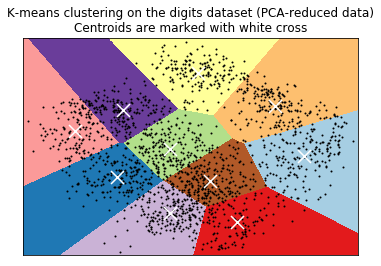

In [7]:
from sklearn.decomposition import PCA
import numpy as np

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(df[df.columns[:64]])
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Understanding the algorithm

Let's talk about the Kmeans algorithm in a bit more depth. In particular, we will examine 4 important initialization parameters that influence the results of the algorithm. Those five are as follows.

* Number of Clusters
* Initialization
* Precision
* Max Iterations

The way Kmeans starts is by first selecting n-starting points to act as the initial group centers. From there, the distance from each observation point is calculated from each of the cluster centers. The point is then assigned the cluster center to which it is closest. Once this has been done for all points, the centroid is then calculated for all those points assigned to a certain group. This then becomes the new group center points and the process is repeated; most points will remain in the same group, but certain edge points will shift from one group to another as the cluster centers themselves change. (Remember our initial cluster points were arbitrary or random, as we didn't know much about the data.) This process continues until either the max number of iterations is reached, or no points shift between groups (this leads to a steady state of the algorithm converging). Alternatively, a precision parameter could be passed specifying algorithm termination if a certain number of points were to not change cluster groupings.

Due to the iterative nature of the Kmeans algorithm, our initialization points are extremely important as to the final cluster results that will be returned. For this reason, Kmeans is often run multiple times on a dataset using different initialization points and the resulting clusters are then compared by how tightly grouped the resulting clusters are. Afterwards, the clusters with the minimal average variance within a cluster are selected as the optimal grouping.

# Practice and Compare

Look at the doc string for the sklearn KMeans method. As we've discussed above, the initialization parameter is extremely important. By default, we have used an intelligent initial guess for cluster centers, which is outside the scope of our current discussion. Try changing this parameter to 'random' as described in the docstring. Also change the max number of iterations to 10 to further ensure that the clusters will be distinct and not converge to similar solutions. Use this method to perform 4 different rounds of clustering and plot the decision boundaries (like we did above) on 4 subplots to compare them.

In [8]:
#Your code here

# Normalization
When calculating the distance between points, the scale of our various features is extremely important. As with linear regression and other algorithms, if one feature is on a larger scale then other features, it will play a disproportionate weight on the convergence of the algorithm. For this reason, normalizing all features to a single scale (or intentionally weighting certain features which you believe to be more meaningful or impactful) is an important preprocessing step to the Kmeans algorithm.

Fortunately, our data has already been normalized, but this is an important fact to remember. 

# Choosing Appropriate K
Another question that naturally arises when discussing the Kmeans algorithm is how to choose an optimal value for K, the number of clusters. Sometimes this can be chosen by practical application purposes, such as wanting 3-5 audience or product groupings. At other times, there might be no obvious answer and as such a hearustic measurement is needed. One measurement which can further shed light on the homogeneity of groupings is inter-cluster variance.

This is easily implemented with the inertia method built into the KMeans instance used to cluster the data. The inertia of clustering is the sum of the distances between points and their groups centroid. At one extreme, this will be greatest when we have one group, and at the other extreme, this value will be zero if we have as many groups as we have data points, since each point would form its own group and the distance bewteen something and itself is zero.

In [9]:
#Retrieving the inertia (total sum of point distances from their cluster center)
kmeans.inertia_

56221.085267189774

# Graphing Inertia for Various Values of K

Iterate over the range 1 to 100, training a new Kmeans algorithm with that amount of clusters. For each, retrieve the inertia of the resulting clusters. Then plot this data on a graph. The x-axis will be the number of clusters (from 1 to 100) and the y-axis will be the inertia associated with the clusters produced from that value of K.

In [ ]:
#Starter Code
for i in range(1,101):
    #Cluster using Kmeans
    #Calculate Inertia
    #Store Data
    #Plot

This forms the basis for the 'elbow' method. As you should see, as the number of clusters increases, the inertia decreases. Typically, we search for an 'elbow' or corner where the rate at which the inertia decreases levels off. In this case, an appropriate number of clusters would be 10; after all, the data is associated with pictures of the digits 0-9.